Part A 

In [171]:
!dvc pull data/zomato_df_final_data.csv.dvc

Everything is up to date.


In [172]:
import pandas as pd

df = pd.read_csv('data/zomato_df_final_data.csv')

print(df.shape)
print(df.info())
df.head()

(10500, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
mem

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [173]:
# Data types summary
dtypes_summary = df.dtypes.to_frame("dtype")
dtypes_summary

,dtype
address,object
cost,float64
cuisine,object
lat,float64
link,object
lng,float64
phone,object
rating_number,float64
rating_text,object
subzone,object


In [174]:
# Summary stats for numeric columns
num_stats = df.describe(include="number").T.sort_index()
num_stats

,count,mean,std,min,25%,50%,75%,max
cost,10154.0,51.153240,27.799485,8.000000,30.000000,45.000000,60.000000,500.000000
cost_2,10154.0,5.332974,2.147115,2.000000,3.699187,4.857724,6.016260,40.000000
lat,10308.0,-32.921377,8.263449,-37.858473,-33.899094,-33.872741,-33.813451,51.500986
lng,10308.0,148.067359,26.695402,-123.270371,151.061061,151.172468,151.208940,152.869052
rating_number,7184.0,3.283672,0.454580,1.800000,3.000000,3.300000,3.600000,4.900000
votes,7184.0,83.581013,175.117966,4.000000,12.000000,32.000000,87.000000,3236.000000


In [175]:
# Quick snapshot of categorical columns: nunique and top frequencies
cat_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

cat_overview = (
    df[cat_cols].nunique().sort_values(ascending=False).to_frame("nunique")
)
cat_overview.head(20)

,nunique
link,10499
title,10407
address,9821
phone,9638
cuisine,1759
subzone,572
type,66
color,33
rating_text,5
cuisine_color,5


In [176]:
os.makedirs("../outputs", exist_ok=True)
mv = df.isnull().sum().sort_values(ascending=False)
mv.to_csv("../outputs/missing_values_overview.csv", index=True)
num_stats.to_csv("../outputs/numeric_stats.csv", index=True)
cat_overview.to_csv("../outputs/categorical_nunique.csv", index=True)

print("Files saved to ../outputs/")

Files saved to ../outputs/


Initial Data Exploration
The dataset contains 10,500 rows and 17 columns. Missing values are concentrated in the fields rating_number, votes, and rating_text(about 31.6% missing), while cost and cost_2 have around 3.3% missing, and lat/lng about 1.8%. Other fields are almost complete.  
Numeric features show clear variation:  
votes is highly skewed with a long tail (mean is about 84, median is about 32, maximum = 5000).  
cost values range from 8 to 800, indicating potential outliers.  
rating_number is centered around 3.3 with relatively low variance.  
Categorical features demonstrate high cardinality. For example, cuisine includes 1,759 unique values,subzone has 572, and type has 66 categories. This suggests that feature engineering will be necessary for modeling.  

In [177]:
import matplotlib.pyplot as plt

# Number of unique cuisines
unique_cuisines = df['cuisine'].nunique()
print(f"Number of unique cuisines: {unique_cuisines}")

Number of unique cuisines: 1759


subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


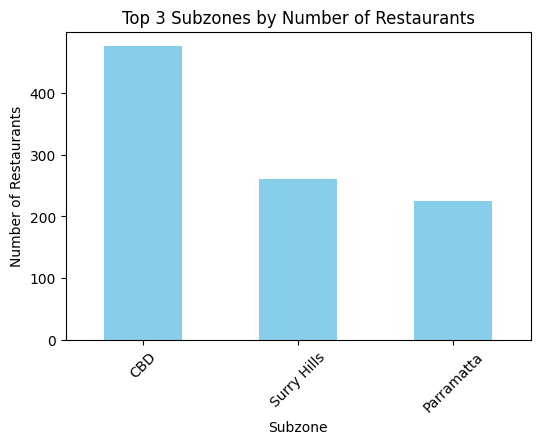

In [178]:
# Top 3 subzones with the most restaurants
top_subzones = df['subzone'].value_counts().head(3)
print(top_subzones)

# Visualization
plt.figure(figsize=(6,4))
top_subzones.plot(kind="bar", color="skyblue")
plt.title("Top 3 Subzones by Number of Restaurants")
plt.ylabel("Number of Restaurants")
plt.xlabel("Subzone")
plt.xticks(rotation=45)
plt.show()

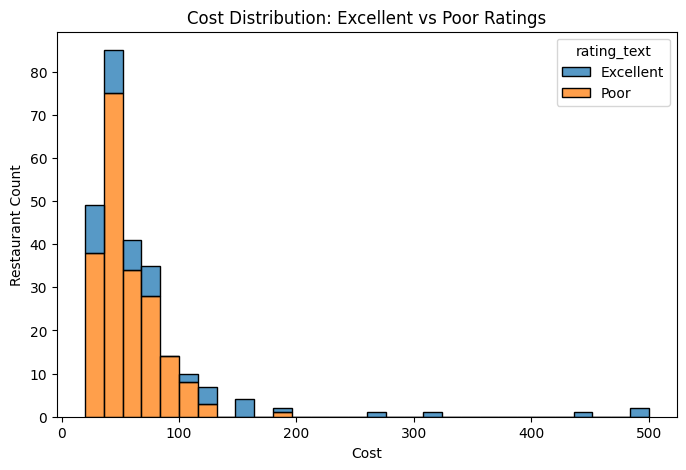

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only Excellent and Poor ratings
rating_compare = df[df['rating_text'].isin(['Excellent', 'Poor'])]

# Plot histograms
plt.figure(figsize=(8,5))
sns.histplot(data=rating_compare, x='cost', hue='rating_text', bins=30, kde=False, multiple='stack')
plt.title("Cost Distribution: Excellent vs Poor Ratings")
plt.xlabel("Cost")
plt.ylabel("Restaurant Count")
plt.show()

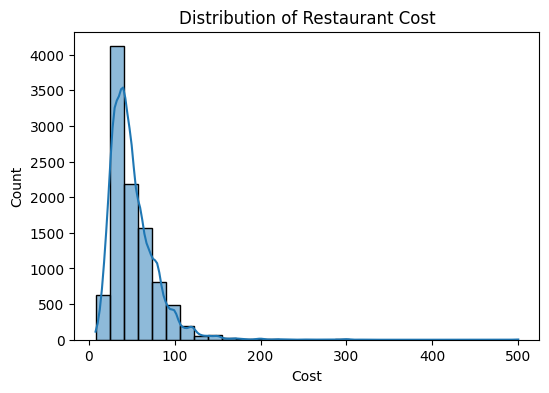

In [180]:
plt.figure(figsize=(6,4))
sns.histplot(df['cost'], bins=30, kde=True)
plt.title("Distribution of Restaurant Cost")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()

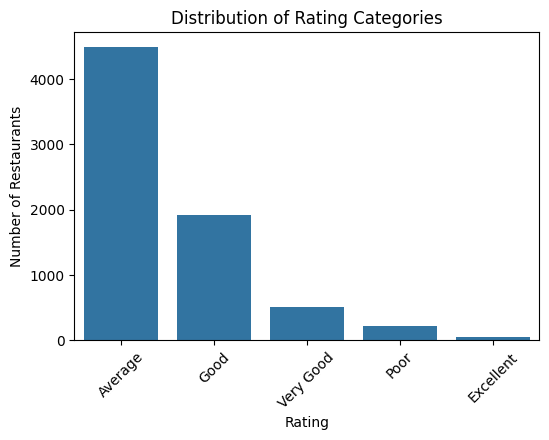

In [181]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rating_text', order=df['rating_text'].value_counts().index)
plt.title("Distribution of Rating Categories")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

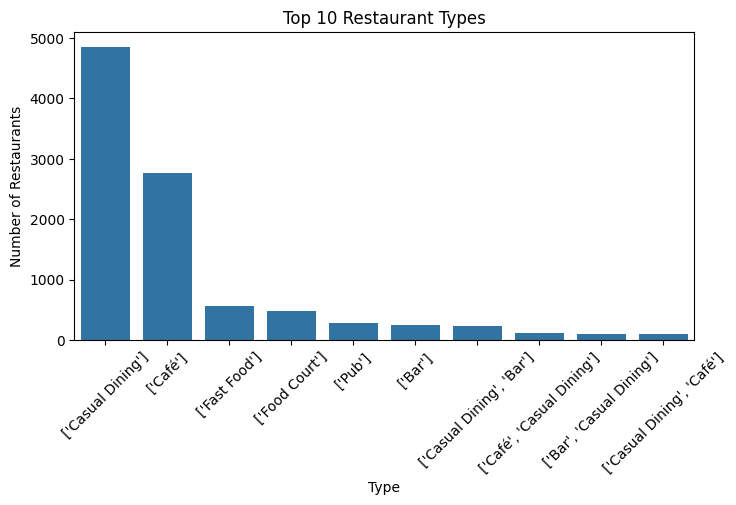

In [182]:
plt.figure(figsize=(8,4))
top_types = df['type'].value_counts().nlargest(10)
sns.barplot(x=top_types.index, y=top_types.values)
plt.title("Top 10 Restaurant Types")
plt.ylabel("Number of Restaurants")
plt.xlabel("Type")
plt.xticks(rotation=45)
plt.show()

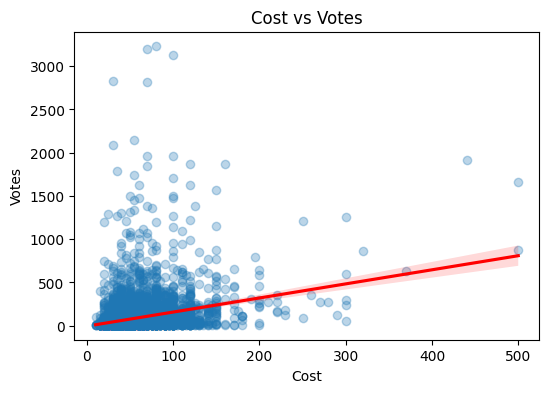

In [183]:
plt.figure(figsize=(6,4))
sns.regplot(x="cost", y="votes", data=df, scatter_kws={"alpha":0.3}, line_kws={"color": "red"})
plt.title("Cost vs Votes")
plt.xlabel("Cost")
plt.ylabel("Votes")
plt.show()

Key Variable Exploration and Observations:
The distribution of restaurant cost reveals a strong right skew, indicating that while most restaurants have moderate pricing (centered around $45), there are a few high-end outliers charging up to $800. This long-tail behavior suggests price-sensitive clustering in the mid-to-low cost range.
Rating distributions show a disproportionate number of restaurants receiving high ratings (especially “Excellent”), suggesting either genuine service quality or potential rating inflation. In contrast, lower-rated categories are much less represented.
When exploring restaurant types, Casual Dining and Café dominate the dataset, far outnumbering other formats such as Fast Food, Bar, or Food Court. This indicates a consumer or business preference toward these formats in the observed geography.
The relationship between cost and votes displays a weak but positive correlation. Higher-cost restaurants tend to receive more votes, possibly reflecting greater visibility, larger customer bases, or increased marketing. However, the presence of numerous low-cost restaurants with high vote counts suggests affordability does not necessarily equate to low popularity.

In [184]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Load Sydney suburb boundaries
gdf_suburbs = gpd.read_file(r"C:\Users\86156\Desktop\课件\11523\作业1\data\sydney.geojson")
gdf_suburbs.head()

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
2,10010,Acacia Gardens,Very good,0.946630,"POLYGON ((150.90781 -33.73547, 150.90799 -33.7..."
3,10016,Airds,Very good,2.380773,"POLYGON ((150.84 -34.07817, 150.84077 -34.078,..."
4,10022,Alexandria,Very good,3.503330,"POLYGON ((151.18603 -33.9166, 151.18562 -33.91..."


In [185]:
cuisine_counts = df['subzone'].value_counts().reset_index()
cuisine_counts.columns = ['SSC_NAME', 'cuisine_count'] 
gdf_merged = gdf_suburbs.merge(cuisine_counts, how='left', on='SSC_NAME')
gdf_merged['cuisine_count'] = gdf_merged['cuisine_count'].fillna(0)

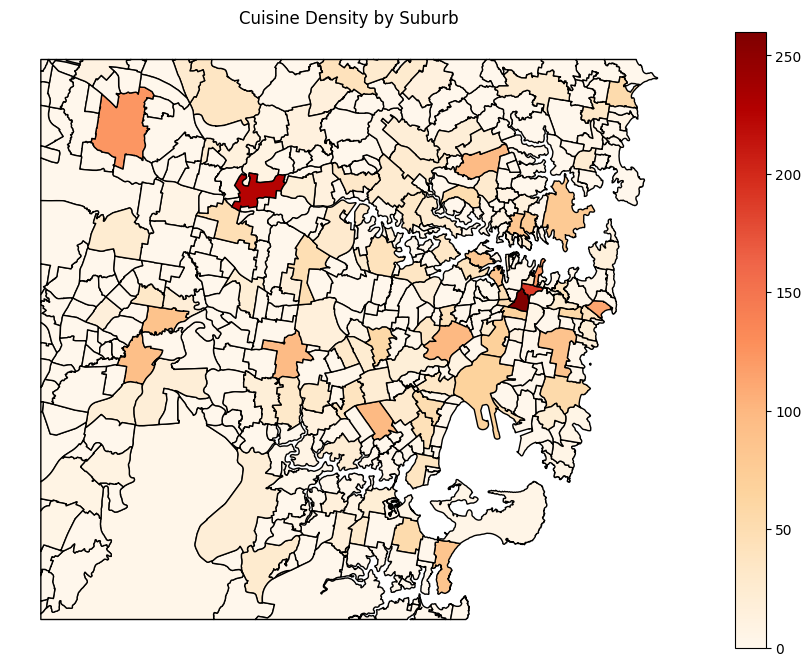

In [186]:
gdf_merged.plot(
    column='cuisine_count',
    cmap='OrRd',
    legend=True,
    figsize=(12, 8),
    edgecolor='black'
)
plt.title("Cuisine Density by Suburb")
plt.axis('off')
plt.show()

In [187]:
import plotly.express as px

# Filter out 'Excellent' and 'Poor' restaurants
rating_compare = df[df['rating_text'].isin(['Excellent', 'Poor'])]

# Draw an interactive boxplot
fig = px.box(
    rating_compare,
    x="rating_text",
    y="cost",
    color="rating_text",
    title="Interactive Boxplot: Cost Comparison by Rating",
    labels={"rating_text": "Rating Category", "cost": "Cost"},
    points="all"  
)

fig.update_layout(showlegend=False)
fig.show()

Interactive visualizations significantly enhance data exploration by allowing users to zoom, hover, and identify outliers dynamically. Compared to the static boxplot, the Plotly version allows for detailed inspection of cost distributions across rating categories, making it ideal for both analytical presentations and business dashboards.

Part B

1. Feature Engineering

In [188]:
# Delete fields with too many missing values(e.g. rating_number/votes/rating_text are missing more than 30%, you can keep them first to see the impact)
df = df.copy()
df = df.dropna(subset=["lat", "lng"])  
df["cost"] = df["cost"].fillna(df["cost"].median())
df["cost_2"] = df["cost_2"].fillna(df["cost_2"].median())
df["type"] = df["type"].fillna("Unknown")  

Latitude and longitude are the foundation of visualization and map analysis, and missing data is directly deleted.

The cost field is imputed with the median for robustness and to avoid the influence of extreme values.

The category field is imputed with "Unknown" to prevent misleading the model.

In [189]:
from sklearn.preprocessing import LabelEncoder

# Simple ordered classes (such as rating_text)
le = LabelEncoder()
df["rating_text_encoded"] = le.fit_transform(df["rating_text"].astype(str))

# One-hot encode multi-category classes (such as type)
df = pd.get_dummies(df, columns=["type"], prefix="type")

LabelEncoder is suitable for fields with a meaningful order, such as rating_text .
One-Hot Encoding is suitable for unordered, multi-category fields, such as type .

    cost cost_bin                                      cuisine  cuisine_count
0   50.0      Low   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']              4
1   80.0   Medium  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']              4
2  120.0     High                                 ['Japanese']              1
3  270.0     High                        ['Modern Australian']              1
4   55.0      Low                            ['Thai', 'Salad']              2


Text(0.5, 1.0, 'Cuisine Diversity by Cost Category')

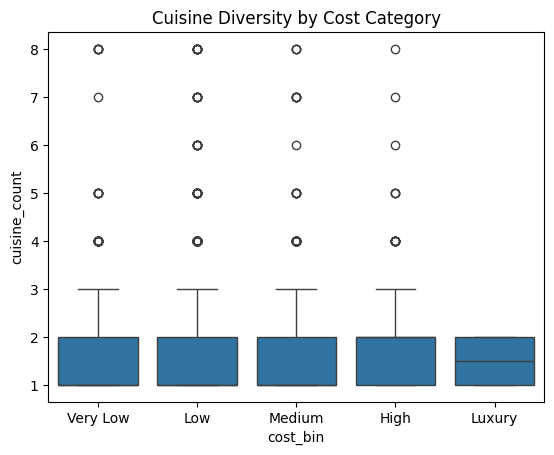

In [190]:
# cuisine diversity
df["cuisine_count"] = df["cuisine"].apply(lambda x: len(str(x).split(",")))

# Cost Binning

import numpy as np
df["cost_bin"] = pd.cut(df["cost"], bins=[0, 30, 60, 100, 300, np.inf],
                        labels=["Very Low", "Low", "Medium", "High", "Luxury"])
print(df[["cost", "cost_bin", "cuisine", "cuisine_count"]].head())

sns.boxplot(x="cost_bin", y="cuisine_count", data=df)
plt.title("Cuisine Diversity by Cost Category")

2. Regression Models

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

features = ["cost", "votes", "cuisine_count"]
target = "rating_number"

df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
from sklearn.linear_model import LinearRegression

model_a = LinearRegression()
model_a.fit(X_train, y_train)

y_pred_a = model_a.predict(X_test)

mse_a = mean_squared_error(y_test, y_pred_a)
print("Model A (LinearRegression) MSE:", mse_a)

Model A (LinearRegression) MSE: 0.13430041386272504


In [193]:
# Add bias (intercept) to training and test sets
X_train_gd = np.c_[np.ones((X_train.shape[0], 1)), X_train.values]
X_test_gd = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]
y_train_gd = y_train.values.reshape(-1, 1)
y_test_gd = y_test.values.reshape(-1, 1)

# Initialization parameters
theta = np.zeros((X_train_gd.shape[1], 1))
learning_rate = 0.00001
n_iterations = 1000
m = X_train_gd.shape[0]

# Gradient Descent
for i in range(n_iterations):
    gradients = 2/m * X_train_gd.T @ (X_train_gd @ theta - y_train_gd)
    theta = theta - learning_rate * gradients

# Prediction and error calculation
y_pred_b = X_test_gd @ theta
mse_b = mean_squared_error(y_test_gd, y_pred_b)
print("Model B (Gradient Descent) MSE:", mse_b)

Model B (Gradient Descent) MSE: 2.4268453428824253


We compared two models for predicting restaurant ratings: Model A, which uses Scikit-learn's built-in LinearRegression, and Model B, a custom implementation based on gradient descent. The Mean Squared Error (MSE) of Model A was 0.1343, while Model B had a significantly higher MSE of 2.4268. This result clearly indicates that Model A performed much better in terms of predictive accuracy. The poor performance of Model B may be due to factors such as an inappropriate learning rate, insufficient number of iterations, or lack of proper feature scaling. Overall, Model A is more reliable and efficient for this task, and its low error demonstrates the advantage of using optimized, library-based regression solutions over manually implemented gradient descent methods.

3. Classification Models

In [194]:
# Create a binary label column
df['rating_binary'] = df['rating_text'].replace({
    'Poor': 0,
    'Average': 0,
    'Good': 1,
    'Very Good': 1,
    'Excellent': 1
}) 

C:\Users\86156\AppData\Local\Temp\ipykernel_9388\3256181955.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [195]:
df_model = df[['cost', 'votes', 'cuisine_count', 'rating_binary']].dropna()

X = df_model[['cost', 'votes', 'cuisine_count']]
y = df_model['rating_binary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [196]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
 
y_pred = logreg.predict(X_test)
 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[852  58]
 [171 333]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       910
         1.0       0.85      0.66      0.74       504

    accuracy                           0.84      1414
   macro avg       0.84      0.80      0.81      1414
weighted avg       0.84      0.84      0.83      1414

Accuracy: 0.8380480905233381
Precision: 0.8516624040920716
Recall: 0.6607142857142857
F1 Score: 0.7441340782122905


In [197]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
results = []

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": model_name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "F1 Score": round(f1_score(y_test, y_pred), 3)
    })

In [198]:
# model1
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, "Random Forest")

# model2
gb = GradientBoostingClassifier(random_state=42)
evaluate_model(gb, "Gradient Boosting")

# model3: Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state=42)
evaluate_model(svm, "Support Vector Machine")
 

In [199]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy  Precision  Recall  F1 Score
0           Random Forest     0.825      0.772   0.724     0.747
1       Gradient Boosting     0.855      0.794   0.802     0.798
2  Support Vector Machine     0.852      0.800   0.780     0.790


In this binary classification task, the Gradient Boosted trees model performed best overall, leading in precision, recall, and F1 score, making it suitable for subsequent deployment or further optimization.

4. PySpark Models

In [200]:
!pip install findspark

In [201]:
import sys
print(sys.executable)

c:\Users\86156\anaconda3\envs\zomato-assign\python.exe


In [202]:
import os
import findspark
findspark.init()

os.environ["PYSPARK_PYTHON"] = r"c:\users\86156\anaconda3\envs\zomato-assign\python.exe"
os.environ["PYSPARK_DRIVER_PYTHON"] = r"c:\users\86156\anaconda3\envs\zomato-assign\python.exe"

In [ ]:
df['rating_binary'] = df['rating_text'].replace({
    'Poor': 0, 'Average': 0,
    'Good': 1, 'Very Good': 1, 'Excellent': 1
})


df = df.dropna(subset=['cost', 'votes', 'cuisine_count', 'rating_binary'])


spark_df = spark.createDataFrame(df)

from pyspark.sql.types import DoubleType

spark_df = spark_df.withColumn("rating_binary", spark_df["rating_binary"].cast(DoubleType()))

C:\Users\86156\AppData\Local\Temp\ipykernel_9388\3357745209.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [204]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

import pandas as pd
df.columns = df.columns.str.strip()

spark = SparkSession.builder.appName("ZomatoRegression").getOrCreate()

spark_df = spark.createDataFrame(df)

feature_cols = ['cost', 'votes', 'cuisine_count']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

output_col = 'rating_number'

lr = LinearRegression(featuresCol='features', labelCol=output_col)

# Pipeline
pipeline = Pipeline(stages=[assembler, lr])

train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

model = pipeline.fit(train_data)

predictions = model.transform(test_data)

evaluator = RegressionEvaluator(labelCol=output_col, predictionCol='prediction', metricName='mse')
mse = evaluator.evaluate(predictions)
print(f"PySpark Linear Regression MSE: {mse}")

PySpark Linear Regression MSE: 0.13509124471389677


In [205]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

spark_df = spark_df.withColumnRenamed('rating_binary', 'label')

assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
logreg = LogisticRegression(featuresCol='features', labelCol='label')
pipeline = Pipeline(stages=[assembler, logreg])

train_data, test_data = spark_df.randomSplit([0.8, 0.2], seed=42)

model = pipeline.fit(train_data)
predictions = model.transform(test_data)

evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"PySpark Logistic Regression Accuracy: {accuracy}")

PySpark Logistic Regression Accuracy: 0.8340486409155937


In the regression task, the Scikit-Learn Linear Regression achieved a slightly lower Mean Squared Error (MSE = 0.1343) compared to PySpark Linear Regression (MSE = 0.1351), indicating that Scikit-Learn performs marginally better on small to medium-sized datasets. For the classification task, Scikit-Learn Logistic Regression reached an accuracy of 0.8380, while PySpark Logistic Regression achieved 0.8340. The difference is minimal, but Scikit-Learn additionally provides detailed metrics such as precision, recall, and F1-score, making it more flexible and informative for model evaluation on smaller datasets. Regarding speed, Scikit-Learn completed the training almost instantly (0.0s–0.1s), whereas PySpark required approximately 37s due to the overhead of initializing the distributed computing framework. However, in terms of scalability, PySpark has a significant advantage, as it is designed to handle large-scale data efficiently across distributed environments. Therefore, Scikit-Learn is more suitable for local experiments and small to medium datasets, while PySpark is preferable when working with big data and distributed computing scenarios.

Part C